In [1]:
%load_ext autoreload
%autoreload 2

# Preparation

## 1. Data download

We download [RCV1 dataset](https://paperswithcode.com/dataset/rcv1), in particular we use tf-idf representation from [sklearn](https://scikit-learn.org/0.18/datasets/rcv1.html).

Create downloader instance.

In [2]:
from model.dataset import RCV1Downloader

downloader = RCV1Downloader()
downloader

RCV1Downloader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz; Downloaded: True]

Download the dataset.

In [3]:
%%time

downloader.download()

INFO: Dataset is already downloaded at /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz
CPU times: user 337 µs, sys: 69 µs, total: 406 µs
Wall time: 264 µs


## 2. d-Gap

Load data.

In [4]:
from model.dataset import RCV1Loader

loader = RCV1Loader()
loader

RCV1Loader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz]

We sort:
 - documents (rows) by decreasing number of distinct terms.
 - terms (columns) by decreasing frequency.

In [5]:
data = loader.load(sort_docs=True, sort_terms=True)

INFO: Loading matrix. 
I/O: Loading /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz. 
INFO: Removing non informative terms. 
INFO: Sorting documents by terms count. 
INFO: Sorting terms by their frequency. 


In [6]:
data

DocumentsCollection[Docs: 804414; Terms: 47219; Nonzero: 60915113]

In [7]:
%%time

data.gaps

INFO: Computing gaps per term


100%|██████████| 804414/804414 [02:06<00:00, 6348.87it/s] 

CPU times: user 2min 5s, sys: 671 ms, total: 2min 5s
Wall time: 2min 6s


{'tot_d_gap': array([804378, 803905, 804375, ..., 303985,  79581, 185606]),
 'tot_gaps': array([355105, 278186, 271267, ...,      1,      1,      1]),
 'avg_d_gap': array([2.26518354e+00, 2.88981113e+00, 2.96525195e+00, ...,
        3.03985000e+05, 7.95810000e+04, 1.85606000e+05]),
 'max_d_gap': array([   155,    398,    193, ..., 303985,  79581, 185606])}

Plot the total *d*-gap per term.

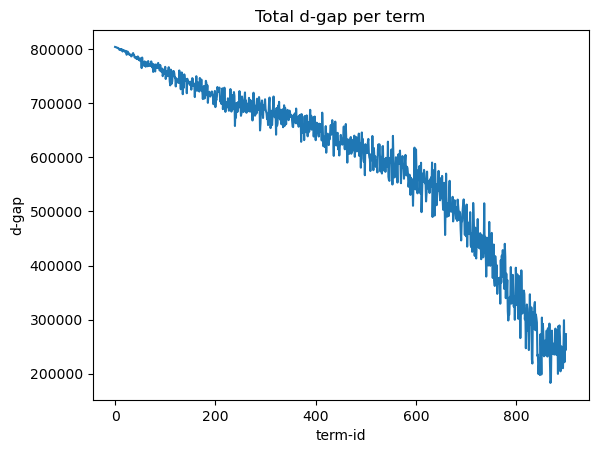

In [8]:
data.plot_tot_d_gap()

Plot the average *d*-gap per term.

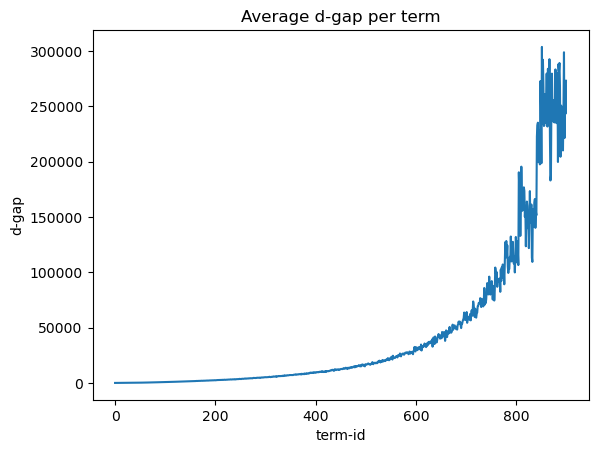

In [9]:
data.plot_avg_d_gap()

Plot the maximum *d*-gap per term.

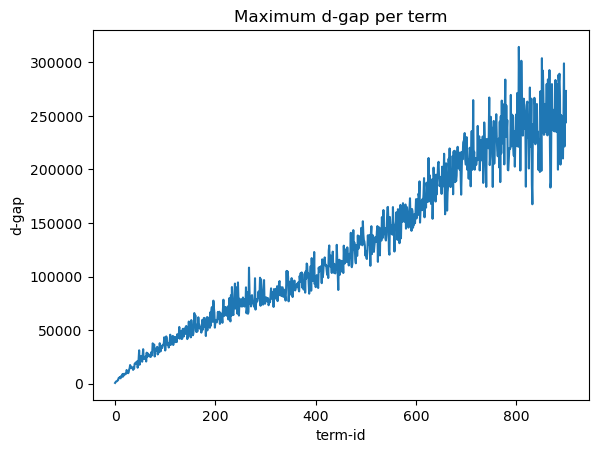

In [10]:
data.plot_max_d_gap()

Overall statistics:

In [12]:
print(f"Total d-gap: {data.tot_d_gap}")
print(f"Average d-gap: {data.avg_d_gap:.0f}")
print(f"Maximum d-gap: {data.max_d_gap}")

Total d-gap: 27734703799
Average d-gap: 44277
Maximum d-gap: 802340
